# Data Collection
- Web Scrapping

### Case Study:
- Used Cars

### 2.Relavant Website:
- > website : www.cars24.com

### 3.Problem Statement :
- Analysis On Used Cars Based on their Features

### 4.Extracting the Data:

In [1]:
import re
import requests
from bs4 import BeautifulSoup
url='https://www.cars24.com/buy-used-car?sort=lhl&serveWarrantyCount=true&listingSource=Homepage_Filters&storeCityId=3686&pinId=500001'
page=requests.get(url)
soup=BeautifulSoup(page.text)

In [2]:
# Columns 
prices=[]
brand=[]
model=[]
fuel=[]
km=[]
year=[]
owner=[]
emi=[]
list1=[500001,380001,560001,600001,201001,122001,450001,302001,682001,700001,226001,400001,110001,201301,411001,202124,134101,641001,141001,440001,422001,800001,360001,124001,394101,390001]
for i in list1:
    url="https://www.cars24.com/buy-used-car?sort=bestmatch&serveWarrantyCount=true&gaId=815119091.1701413669&storeCityId=3686&pinId="+str(i)
    print(url)
    page = requests.get(url)
    soup = BeautifulSoup(page.text)
    p=soup.find_all('div',class_="_18ToE")
    for i in p:
        prices.append(i.text.split('₹')[1])
    y=soup.find_all('div',class_="_1mlAq")
    for i in y:
        year.append(i.text.split()[0])
    b=soup.find_all('div',class_="_1mlAq")
    for i in b:
        brand.append(i.text.split()[1])
    m=soup.find_all('div',class_="_1mlAq")
    for i in m:
        model.append(i.text.split()[2])
    k=soup.find_all('ul',class_="_13yb6")
    for i in k:
        km.append(i.text.split()[0])
    f=soup.find_all('ul',class_="_13yb6")
    for i in f:
        a=i.text
        b=re.findall('Petrol|Diesel',a)
        if len(b)>0:
            fuel.append(b[0])
    s=soup.find_all('ul',class_="_13yb6")
    for i in s:
        a=i.text
        b=re.findall("(1|2)",a)
        if len(b)>0:
            owner.append(b[0])
    e=soup.find_all("div",class_="_1Em-A")
    for i in e:
        emi.append(i.text.split("/")[0].split("₹")[1])
        
    print("brands----->",len(brand))
    print("models---->",len(model))
    print("prices---->",len(prices))
    print("year---->",len(year))
    print("fuel---->",len(fuel))
    print("km---->",len(km))
    print("owner---->",len(owner))
    print("EMI---->",len(emi))

https://www.cars24.com/buy-used-car?sort=bestmatch&serveWarrantyCount=true&gaId=815119091.1701413669&storeCityId=3686&pinId=500001
brands-----> 20
models----> 20
prices----> 20
year----> 20
fuel----> 20
km----> 20
owner----> 20
EMI----> 20
https://www.cars24.com/buy-used-car?sort=bestmatch&serveWarrantyCount=true&gaId=815119091.1701413669&storeCityId=3686&pinId=380001
brands-----> 40
models----> 40
prices----> 40
year----> 40
fuel----> 40
km----> 40
owner----> 40
EMI----> 40
https://www.cars24.com/buy-used-car?sort=bestmatch&serveWarrantyCount=true&gaId=815119091.1701413669&storeCityId=3686&pinId=560001
brands-----> 60
models----> 60
prices----> 60
year----> 60
fuel----> 60
km----> 60
owner----> 60
EMI----> 60
https://www.cars24.com/buy-used-car?sort=bestmatch&serveWarrantyCount=true&gaId=815119091.1701413669&storeCityId=3686&pinId=600001
brands-----> 80
models----> 80
prices----> 80
year----> 80
fuel----> 80
km----> 80
owner----> 80
EMI----> 80
https://www.cars24.com/buy-used-car?sort

### 5.Creating a DataFrame:

In [7]:
dict1={"Brand":brand,
      "Model":model,
      "Year":year,
      "Price":prices,
      "Fuel":fuel,
      "KM":km,
      "Owner":owner,
      "EMI":emi}

In [11]:
import pandas as pd
data=pd.DataFrame(dict1)
data

,Brand,Model,Year,Price,Fuel,KM,Owner,EMI
0,Tata,NEXON,2020,"8,28,000",Diesel,"56,519",1,"15,760"
1,Maruti,Ertiga,2013,"6,20,000",Diesel,"95,128",1,"12,121"
2,Renault,Kwid,2016,"2,72,000",Petrol,"42,203",2,"5,318"
3,Hyundai,Creta,2018,"10,07,000",Petrol,"86,368",2,"19,167"
4,Ford,FREESTYLE,2018,"5,85,000",Petrol,"35,161",1,"11,437"
...,...,...,...,...,...,...,...,...
515,Toyota,Innova,2017,"16,29,000",Diesel,"52,793",2,"31,007"
516,Hyundai,AURA,2022,"7,70,000",Petrol,"23,933",2,"15,054"
517,Maruti,Alto,2015,"2,45,000",Petrol,"73,944",1,"4,790"
518,Hyundai,i20,2011,"2,73,000",Diesel,"90,156",1,"5,337"


### 6.Exporting into .csv format

In [12]:
data.to_csv("D:\NewCarData.csv")

### 7.Read CSV File:

In [60]:
import pandas as pd
df=pd.read_csv(r"D:\NewCarData.csv")
df

,Unnamed: 0,Brand,Model,Year,Price,Fuel,KM,Owner,EMI
0,0,Tata,NEXON,2020,"8,28,000",Diesel,"106,575",1,"15,760"
1,1,Maruti,Ertiga,2013,"6,20,000",Diesel,"91,286",1,"12,121"
2,2,Renault,Kwid,2016,"2,72,000",Petrol,"84,557",2,"5,318"
3,3,Hyundai,Creta,2018,"10,07,000",Petrol,"82,646",2,"19,167"
4,4,Ford,FREESTYLE,2018,"5,85,000",Petrol,"60,421",1,"11,437"
...,...,...,...,...,...,...,...,...,...
515,515,Toyota,Innova,2017,"16,29,000",Diesel,"105,553",2,"31,007"
516,516,Hyundai,AURA,2022,"7,70,000",Petrol,"104,051",2,"15,054"
517,517,Maruti,Alto,2015,"2,45,000",Petrol,"47,162",1,"4,790"
518,518,Hyundai,i20,2011,"2,73,000",Diesel,"115,388",1,"5,337"


### 8.Cleaning the Data:

In [43]:
# DataFrame Columns
df.columns

Index(['Unnamed: 0', 'Brand', 'Model', 'Year', 'Price', 'Fuel', 'KM', 'Owner',
       'EMI'],
      dtype='object')

In [61]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,Brand,Model,Year,Price,Fuel,KM,Owner,EMI
0,Tata,NEXON,2020,"8,28,000",Diesel,"106,575",1,"15,760"
1,Maruti,Ertiga,2013,"6,20,000",Diesel,"91,286",1,"12,121"
2,Renault,Kwid,2016,"2,72,000",Petrol,"84,557",2,"5,318"
3,Hyundai,Creta,2018,"10,07,000",Petrol,"82,646",2,"19,167"
4,Ford,FREESTYLE,2018,"5,85,000",Petrol,"60,421",1,"11,437"
...,...,...,...,...,...,...,...,...
515,Toyota,Innova,2017,"16,29,000",Diesel,"105,553",2,"31,007"
516,Hyundai,AURA,2022,"7,70,000",Petrol,"104,051",2,"15,054"
517,Maruti,Alto,2015,"2,45,000",Petrol,"47,162",1,"4,790"
518,Hyundai,i20,2011,"2,73,000",Diesel,"115,388",1,"5,337"


In [62]:
# Checking Null Values
df.isnull().sum()

Brand    0
Model    0
Year     0
Price    0
Fuel     0
KM       0
Owner    0
EMI      0
dtype: int64

In [63]:
# Checking Duplicates
df.duplicated().sum()

0

In [64]:
# Checking Duplicates
df.dtypes

Brand    object
Model    object
Year      int64
Price    object
Fuel     object
KM       object
Owner     int64
EMI      object
dtype: object

### Type Casting

In [65]:
# Type Casting of Price column
df["Price"]=[i.replace(",","") for i in df["Price"]]
df["Price"]=df["Price"].astype("int")
# Type Casting of KM column
df["KM"]=[i.replace(",","") for i in df["KM"]]
df["KM"]=df["KM"].astype("int")
# Type Casting of EMI column
df["EMI"]=[i.replace(",","") for i in df["EMI"]]
df["EMI"]=df["EMI"].astype("int")
df.dtypes

Brand    object
Model    object
Year      int64
Price     int32
Fuel     object
KM        int32
Owner     int64
EMI       int32
dtype: object

In [66]:
df['Year'] = pd.to_datetime(df['Year'])

In [67]:
df.dtypes

Brand            object
Model            object
Year     datetime64[ns]
Price             int32
Fuel             object
KM                int32
Owner             int64
EMI               int32
dtype: object

In [49]:
df["Owner"]=df["Owner"].astype('str')

In [50]:
df["Owner"]=[i.replace("1","1st") for i in df["Owner"]]

In [51]:
df["Owner"]=[i.replace("2","2nd") for i in df["Owner"]]

In [39]:
df.to_csv("D:\EDADF.csv",index=False)

In [1]:
import pandas as pd
df=pd.read_csv(r"D:\EDADF.csv")
df

,Unnamed: 0.1,Unnamed: 0,Brand,Model,Year,Price,Fuel,KM,Owner,EMI
0,0,0,Tata,NEXON,2020-01-01,828000,Diesel,106575,1st,15760
1,1,1,Maruti,Ertiga,2013-01-01,620000,Diesel,91286,1st,12121
2,2,2,Renault,Kwid,2016-01-01,272000,Petrol,84557,2nd,5318
3,3,3,Hyundai,Creta,2018-01-01,1007000,Petrol,82646,2nd,19167
4,4,4,Ford,FREESTYLE,2018-01-01,585000,Petrol,60421,1st,11437
...,...,...,...,...,...,...,...,...,...,...
515,515,515,Toyota,Innova,2017-01-01,1629000,Diesel,105553,2nd,31007
516,516,516,Hyundai,AURA,2022-01-01,770000,Petrol,104051,2nd,15054
517,517,517,Maruti,Alto,2015-01-01,245000,Petrol,47162,1st,4790
518,518,518,Hyundai,i20,2011-01-01,273000,Diesel,115388,1st,5337


In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,Brand,Model,Year,Price,Fuel,KM,Owner,EMI
0,Tata,NEXON,2020-01-01,828000,Diesel,106575,1st,15760
1,Maruti,Ertiga,2013-01-01,620000,Diesel,91286,1st,12121
2,Renault,Kwid,2016-01-01,272000,Petrol,84557,2nd,5318
3,Hyundai,Creta,2018-01-01,1007000,Petrol,82646,2nd,19167
4,Ford,FREESTYLE,2018-01-01,585000,Petrol,60421,1st,11437
...,...,...,...,...,...,...,...,...
515,Toyota,Innova,2017-01-01,1629000,Diesel,105553,2nd,31007
516,Hyundai,AURA,2022-01-01,770000,Petrol,104051,2nd,15054
517,Maruti,Alto,2015-01-01,245000,Petrol,47162,1st,4790
518,Hyundai,i20,2011-01-01,273000,Diesel,115388,1st,5337


# Data Analysis

In [4]:
df.head()

,Brand,Model,Year,Price,Fuel,KM,Owner,EMI
0,Tata,NEXON,2020-01-01,828000,Diesel,106575,1st,15760
1,Maruti,Ertiga,2013-01-01,620000,Diesel,91286,1st,12121
2,Renault,Kwid,2016-01-01,272000,Petrol,84557,2nd,5318
3,Hyundai,Creta,2018-01-01,1007000,Petrol,82646,2nd,19167
4,Ford,FREESTYLE,2018-01-01,585000,Petrol,60421,1st,11437


In [5]:
df.columns

Index(['Brand', 'Model', 'Year', 'Price', 'Fuel', 'KM', 'Owner', 'EMI'], dtype='object')

In [6]:
df.describe()

,Price,KM,EMI
count,5.200000e+02,520.000000,520.00000
mean,5.848000e+05,74338.959615,11343.65000
std,3.205968e+05,28780.516096,6081.26764
min,2.450000e+05,28354.000000,4790.00000
25%,3.532500e+05,47801.750000,6906.50000
50%,5.555000e+05,73074.500000,10860.50000
75%,7.337500e+05,102016.250000,14345.00000
max,1.629000e+06,120777.000000,31007.00000


## Univariate Analysis

#### Counting the Unique Values in each Column

In [7]:
print(len(df['Brand'].unique()))
print(len(df['Model'].unique()))
print(len(df['Year'].unique()))
print(len(df['Price'].unique()))
print(len(df['Fuel'].unique()))
print(len(df['KM'].unique()))
print(len(df['Owner'].unique()))
print(len(df["EMI"].unique()))

7
15
11
20
2
518
2
20


In [8]:
df['Brand'].value_counts()

Brand
Maruti     156
Hyundai    156
Tata        52
Renault     52
Honda       52
Ford        26
Toyota      26
Name: count, dtype: int64

In [9]:
df["Model"].value_counts()

Model
Swift        104
NEXON         52
Kwid          52
Ertiga        26
Creta         26
FREESTYLE     26
i10           26
Verna         26
Amaze         26
GRAND         26
City          26
Innova        26
AURA          26
Alto          26
i20           26
Name: count, dtype: int64

## Bivariate Analysis

#### Group by Fuel Type and Calculate Average Price

In [10]:
average_price_by_fuel = df.groupby('Fuel')['Price'].mean()
print(average_price_by_fuel)

Fuel
Diesel    702166.666667
Petrol    534500.000000
Name: Price, dtype: float64


#### Group by Car Brand and Count the Number of Models

In [11]:
model_count_by_brand = df.groupby('Brand')['Model'].nunique()
print(model_count_by_brand)

Brand
Ford       1
Honda      2
Hyundai    6
Maruti     3
Renault    1
Tata       1
Toyota     1
Name: Model, dtype: int64


#### Group by Year and Calculate the Total Kilometers Driven

In [83]:
total_kilometers_by_year = df.groupby('Year')['KM'].sum()
print(total_kilometers_by_year)

Year
2011-01-01    5828769
2012-01-01    3963294
2013-01-01    1860243
2015-01-01    4089988
2016-01-01    3711406
2017-01-01    4230990
2018-01-01    5679326
2019-01-01    3784748
2020-01-01    1724248
2021-01-01    1794075
2022-01-01    1989172
Name: KM, dtype: int64


#### Group by Number of Owners and Calculate Median Price

In [12]:
median_price_by_owners = df.groupby('Owner')['Price'].median()
print(median_price_by_owners)

Owner
1st    523500.0
2nd    555500.0
Name: Price, dtype: float64


#### Group by Model and Calculate Maximum EMI

In [13]:
max_emi_by_model = df.groupby('Model')['EMI'].max()
print(max_emi_by_model)

Model
AURA         15054
Alto          4790
Amaze         9032
City         10323
Creta        19167
Ertiga       12121
FREESTYLE    11437
GRAND        14252
Innova       31007
Kwid          7058
NEXON        15760
Swift        11398
Verna        14624
i10           5122
i20           5337
Name: EMI, dtype: int64


# Multivariate Analysis

#### Group by Brand and Calculate Average Price and Maximum Kilometers Driven

In [14]:
grouped_data = df.groupby('Brand').agg({'Price': 'mean', 'KM': 'max'})
print(grouped_data)

             Price      KM
Brand                     
Ford      585000.0  120247
Honda     495000.0  114049
Hyundai   631500.0  120582
Maruti    424500.0  120777
Renault   316500.0  120716
Tata      761500.0  120195
Toyota   1629000.0  120162


## Data Visuvalization

- > For Univariate

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution Of Price Data')

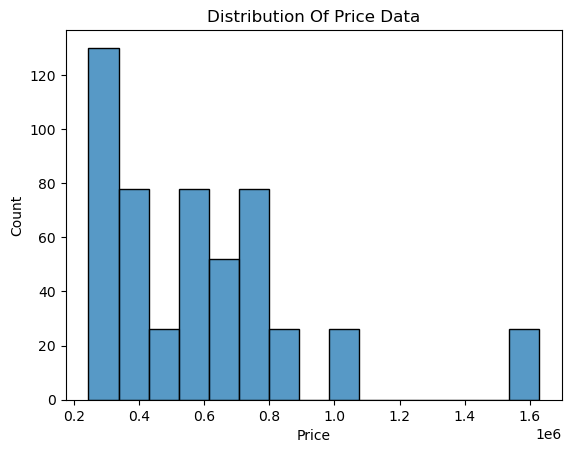

In [16]:
#  How prices are spread across different ranges.
sns.histplot(x=df["Price"])
plt.title("Distribution Of Price Data")

<BarContainer object of 520 artists>

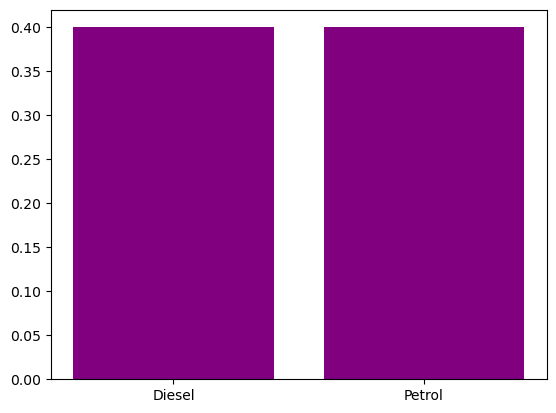

In [17]:
# Percentage of each fuel type
plt.bar(df["Fuel"],height=0.4,color='purple')

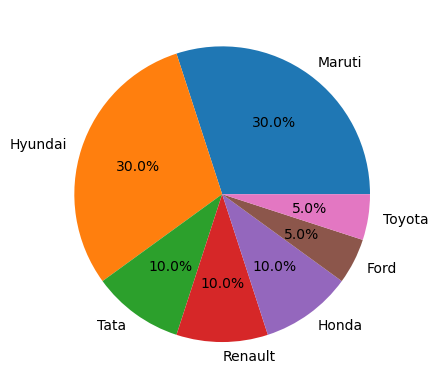

In [18]:
x=df["Brand"].value_counts()
plt.pie(x.values,labels=x.index,autopct='%1.1f%%')
plt.show()

- > For Bivariate 

In [19]:
df1=df.groupby(["Price"]).count()["Model"]
df1

Price
245000     26
262000     26
272000     26
273000     26
330000     26
361000     26
368000     26
401000     26
462000     26
528000     26
583000     26
585000     26
620000     26
695000     26
729000     26
748000     26
770000     26
828000     26
1007000    26
1629000    26
Name: Model, dtype: int64

In [20]:
average_price_by_fuel = df.groupby('Fuel')['Price'].mean()
print(average_price_by_fuel)

Fuel
Diesel    702166.666667
Petrol    534500.000000
Name: Price, dtype: float64


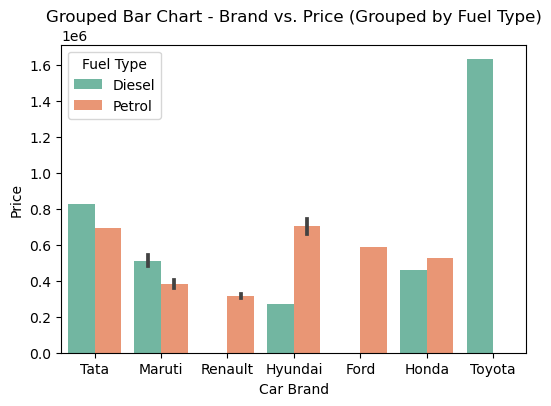

In [21]:
plt.figure(figsize=(6,4))
sns.barplot(x='Brand', y='Price', hue='Fuel', data=df, palette='Set2')
plt.title('Grouped Bar Chart - Brand vs. Price (Grouped by Fuel Type)')
plt.xlabel('Car Brand')
plt.ylabel('Price')
plt.legend(title='Fuel Type')
plt.show()

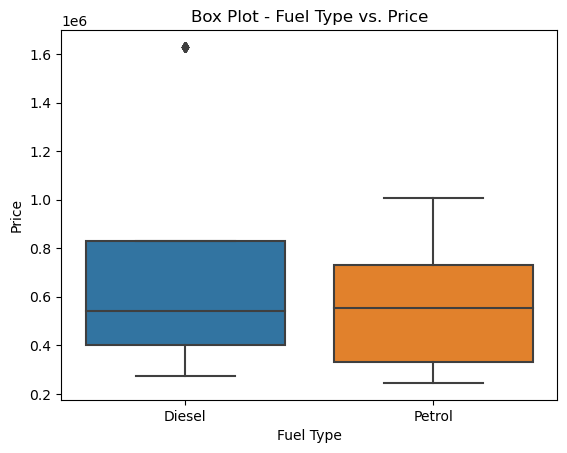

In [22]:
sns.boxplot(x='Fuel', y='Price', data=df)
plt.title('Box Plot - Fuel Type vs. Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

- > For Multivariate

In [23]:
numerical_columns = df[['Price', 'KM', 'EMI']]
numerical_columns.corr()

,Price,KM,EMI
Price,1.000000,0.017614,0.999799
KM,0.017614,1.000000,0.017423
EMI,0.999799,0.017423,1.000000


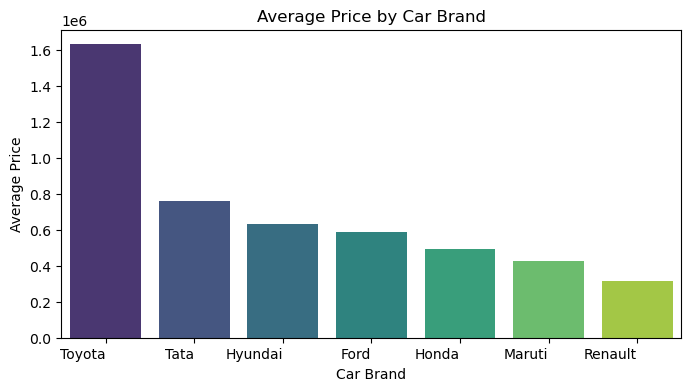

In [25]:
# Calculate the average price for each car model
average_price_by_Brand = df.groupby('Brand')['Price'].mean().reset_index()
# Sort the data by average price in descending order for better visualization
average_price_by_Brand = average_price_by_Brand.sort_values(by='Price', ascending=False)
# Create a grouped bar chart using Seaborn
plt.figure(figsize=(8,4))
sns.barplot(x='Brand', y='Price', data=average_price_by_Brand, palette='viridis')
plt.xticks(ha='right')
plt.title('Average Price by Car Brand')
plt.xlabel('Car Brand')
plt.ylabel('Average Price')
plt.show()

C:\Users\PC\.anaconda\32\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


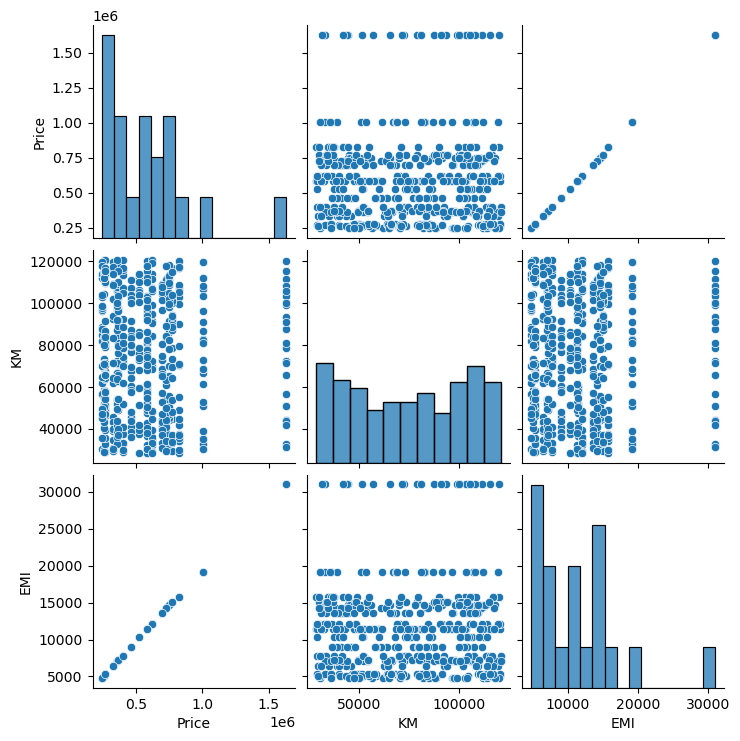

In [26]:
numeric_columns =df[['Price','KM','EMI']]
sns.pairplot(numeric_columns)
plt.show()

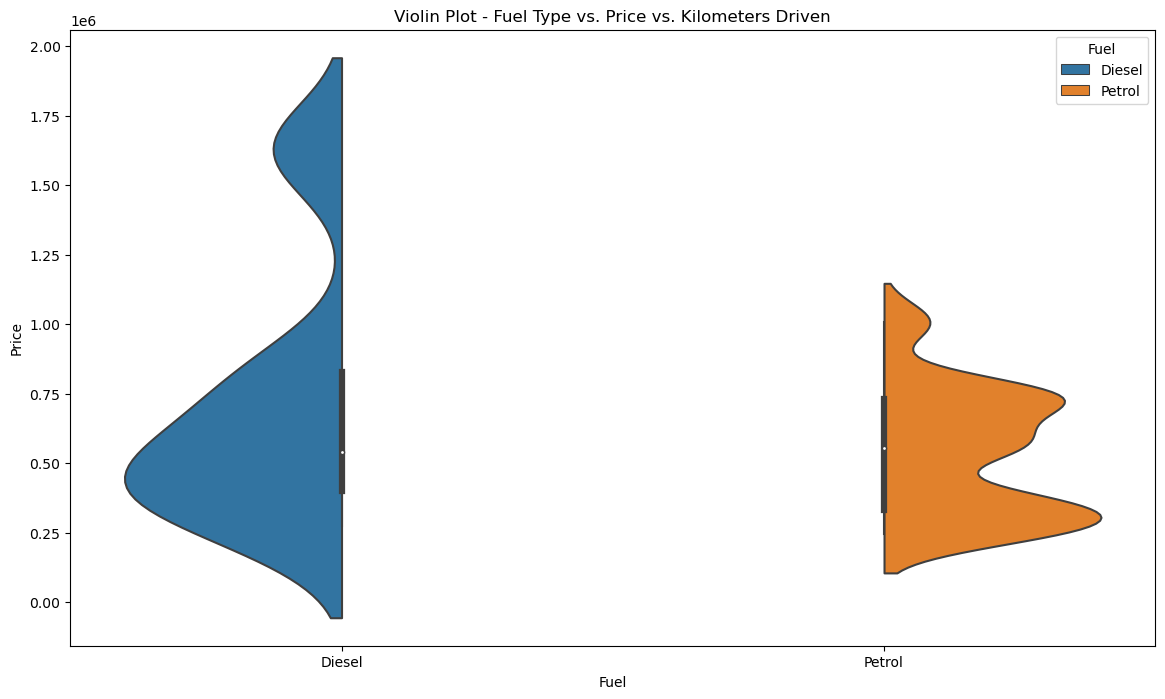

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
sns.violinplot(x='Fuel', y='Price', hue='Fuel', data=df, split=True)
plt.title('Violin Plot - Fuel Type vs. Price vs. Kilometers Driven')
plt.xlabel('Fuel')
plt.ylabel('Price')
plt.show()